In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 1. 활성화 함수 구현
def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
  return np.maximum(0,x)

def softmax(x):
  exp_x = np.exp(x - np.max(x, axis = -1, keepdims = True))
  return exp_x / np.sum(exp_x, axis=-1, keepdims = True)


In [9]:
# 2. 순전파 함수 구현
def forward(x, weights):
  # 레이어 별 가중치와 편향
  W1, b1 = weights['W1'], weights['b1']
  W2, b2 = weights['W2'], weights['b2']
  W3, b3 = weights['W3'], weights['b3']

  # 첫번째 레이어
  z1 = np.dot(x, W1) + b1
  a1 = relu(z1)

  # 두번째 레이어
  z2 = np.dot(a1, W2) + b2
  a2 = relu(z2)

  # 세번째 레이어
  z3 = np.dot(a2, W3) + b3
  a3 = softmax(z3)

  return a3

In [12]:
# MNIST 데이터셋 로딩
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

# 데이터 전처리
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_test = y_test

# 가중치 로드
weights = np.load('weights.npz')

# 예측 및 시각화
def predict_and_visualize(num_samples=10):
    # 랜덤 샘플 선택
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    # 서브플롯 준비
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, idx in enumerate(indices):
        # 이미지 추출 및 reshape
        image = X_test[idx].reshape(1, -1)

        # 예측 수행
        predictions = forward(image, weights)
        predicted_class = np.argmax(predictions)
        true_class = y_test[idx]

        # 이미지 시각화
        axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Pred: {predicted_class}, True: {true_class}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


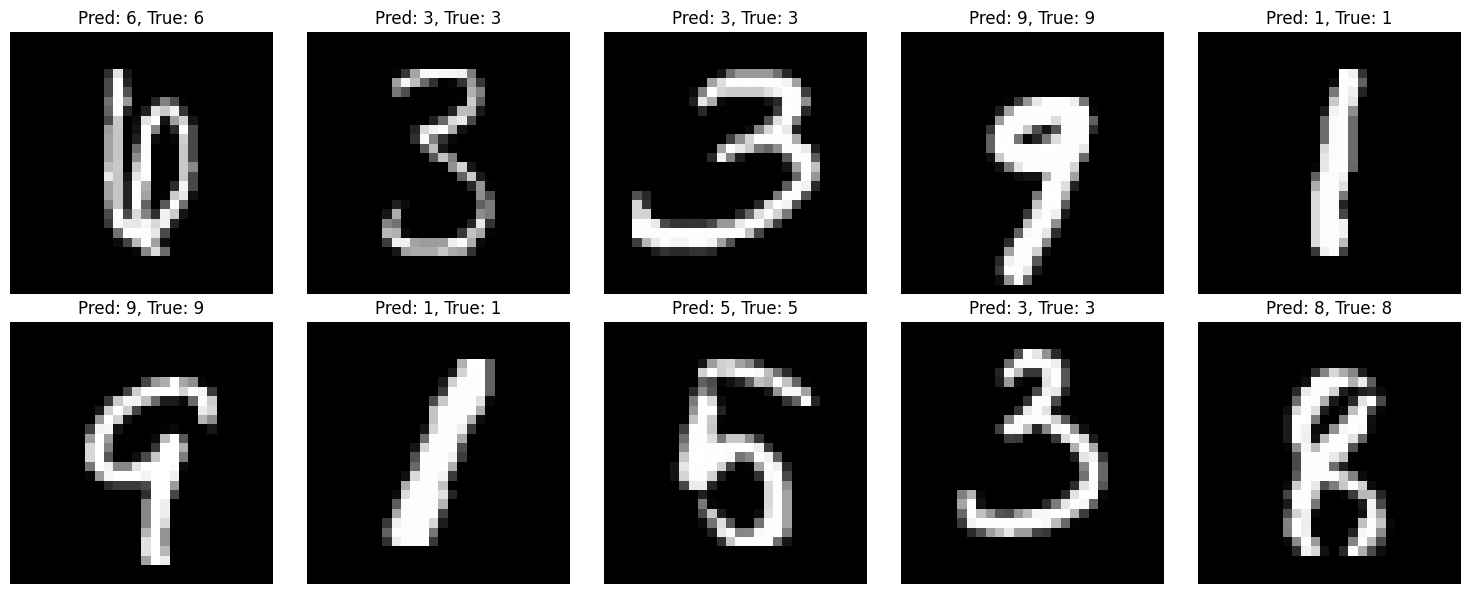

Accuracy: 95.00%


In [14]:
# 정확도 계산
def calculate_accuracy(num_samples=100):
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    correct_predictions = 0
    for idx in indices:
        image = X_test[idx].reshape(1, -1)
        predictions = forward(image, weights)
        predicted_class = np.argmax(predictions)
        true_class = y_test[idx]

        if predicted_class == true_class:
            correct_predictions += 1

    accuracy = correct_predictions / num_samples
    print(f"Accuracy: {accuracy * 100:.2f}%")

# 실행
predict_and_visualize()
calculate_accuracy()